<a href="https://colab.research.google.com/github/pahwa1902/Learning/blob/master/RetailPricesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_extraction import FeatureHasher

In [126]:
training_data = pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Test.csv')

In [34]:
training_data = training_data.drop_duplicates()

In [43]:
split = int(0.95*len(training_data))
train_data = training_data[:split]
validate_data = training_data[split:]

In [7]:
train_data.reset_index(drop=True,inplace=True)

In [ ]:
train_data[train_data['StockCode']==520]

In [5]:
product_list = train_data['StockCode'].unique()

In [5]:
train_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
total_quantity = train_data.groupby(['StockCode']).Quantity.sum()

In [7]:
a = train_data['StockCode'].unique()
b = test_data['StockCode'].unique()

In [30]:
price = (train_data['UnitPrice'])

In [46]:
df_corr= train_data.loc[:,['StockCode','Description','Quantity','UnitPrice','CustomerID','Country']].corr()

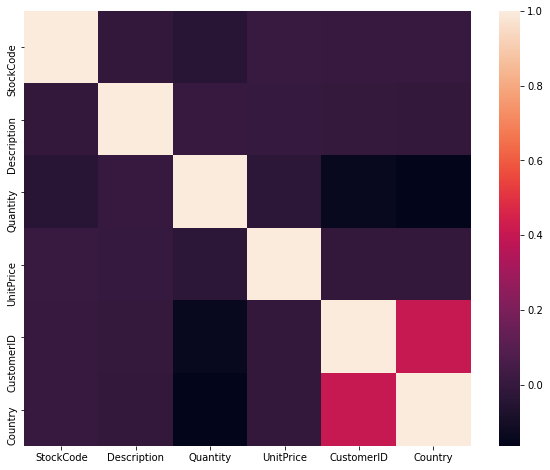

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr)

In [ ]:
train_data['Quantity'].unique()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


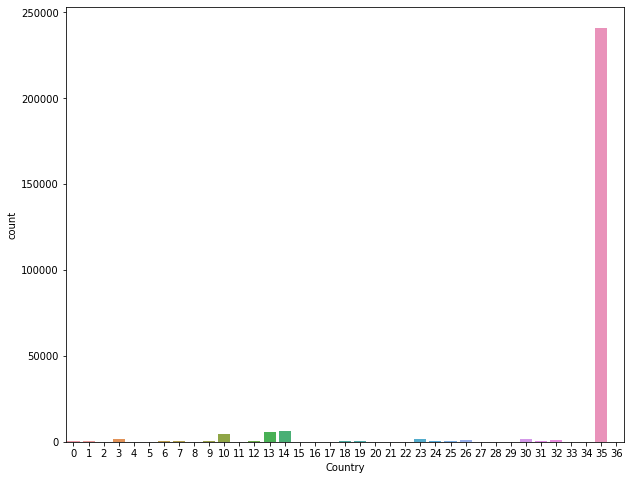

In [382]:
plt.figure(figsize=(10,8))
sns.countplot(train_data['Country'])

In [422]:
df = pd.DataFrame(train_data.groupby(['Country'])['UnitPrice'].mean().sort_values(ascending=True))

<Figure size 720x576 with 0 Axes>

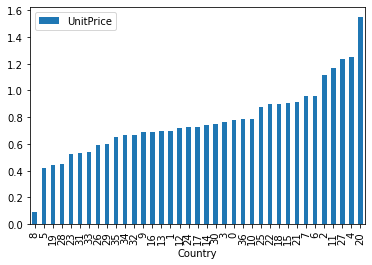

In [423]:
plt.figure(figsize=(10,8))
df.plot.bar()

In [424]:
demand = pd.DataFrame(train_data.groupby(['Country'])['Quantity'].sum().sort_values(ascending=True))

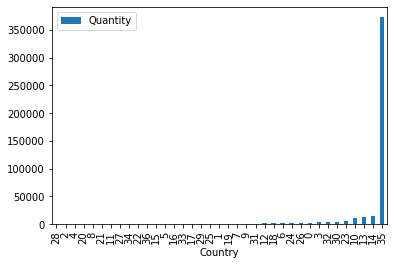

In [425]:
demand.plot.bar()

In [9]:
negative_demand = train_data[train_data['Quantity']<0].index
train_data.drop(negative_demand,inplace=True)

In [10]:
train_data.reset_index(drop=True,inplace=True)

In [11]:
zero_price = train_data[train_data['UnitPrice']<=0].index

In [12]:
train_data.drop(zero_price,inplace=True)

In [13]:
train_data.reset_index(drop=True,inplace=True)

In [14]:
train_data_copy = train_data.copy()

In [15]:
price_corrected = np.log(train_data['UnitPrice'])

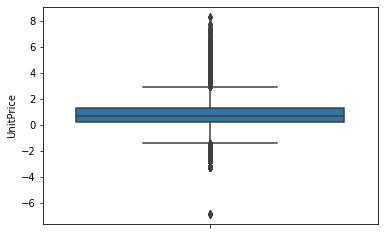

In [517]:
sns.boxplot(y=price_corrected)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


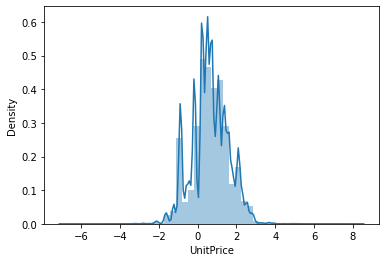

In [518]:
sns.distplot(price_corrected)

In [16]:
Q1_price = price_corrected.quantile(0.25)
Q3_price = price_corrected.quantile(0.75)
IQR_price = Q3_price-Q1_price

lower_fence_price = Q1_price - (1.5*IQR_price)
upper_fence_price = Q3_price + (1.5*IQR_price)

In [17]:
max_price_upper = price_corrected[price_corrected>upper_fence_price].index
max_price_lower = price_corrected[price_corrected<lower_fence_price].index

In [18]:
max_price = np.concatenate([np.array(max_price_upper),np.array(max_price_lower)])

In [19]:
train_data.drop(max_price,inplace=True)

In [20]:
train_data.reset_index(drop=True,inplace=True)

In [21]:
train_data['UnitPrice'] = np.log(train_data['UnitPrice'])

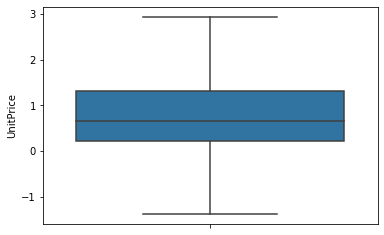

In [525]:
sns.boxplot(y=price_limit)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


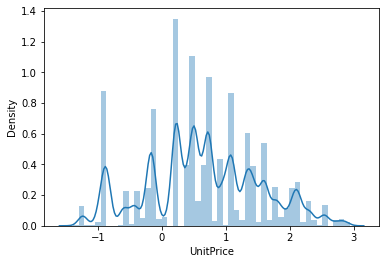

In [526]:
sns.distplot(price_limit)

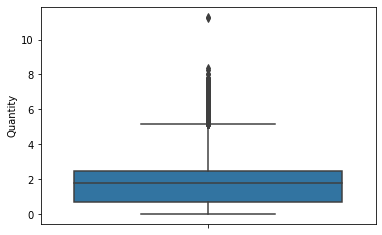

In [345]:
sns.boxplot(y=demand)

In [49]:
demand = (train_data['Quantity'])

In [50]:
Q1 = demand.quantile(0.25)
Q3 = demand.quantile(0.75)
IQR = Q3-Q1
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

In [51]:
max_index = demand[demand>Upper_Fence].index
min_index = demand[demand<Lower_Fence].index

In [52]:
indexes = np.concatenate([np.array(max_index),np.array(min_index)])

In [ ]:
train_data.drop(indexes,inplace=True)

In [54]:
train_data.reset_index(drop=True,inplace=True)

In [ ]:
train_data[train_data['Quantity']<0]

In [27]:
demand_corrected = np.log(train_data['Quantity'])

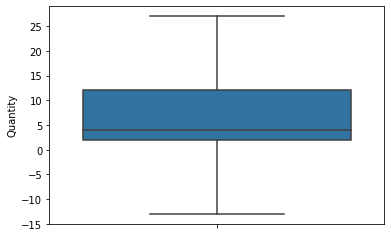

In [55]:
sns.boxplot(y=(train_data['Quantity']))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


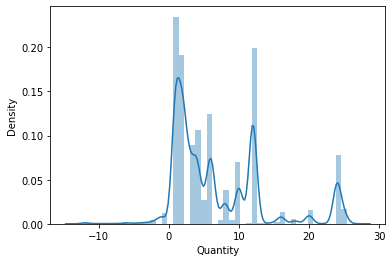

In [56]:
sns.distplot(train_data['Quantity'])

In [28]:
train_data['Quantity'] = demand_corrected

In [29]:
quantity = pd.DataFrame(train_data.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=True))

In [30]:
zero_rows = quantity[quantity['Quantity']==0].index

for i in zero_rows:
  quantity['Quantity'].loc[i] = 0.1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


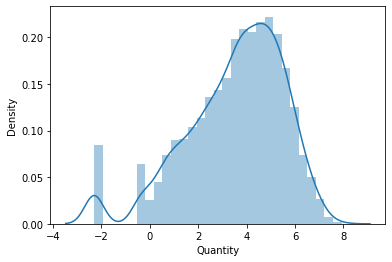

In [28]:
sns.distplot(np.log(quantity['Quantity']))

In [31]:
stockprice = pd.DataFrame(train_data.groupby(['StockCode'])['UnitPrice'].sum().sort_values(ascending=True))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


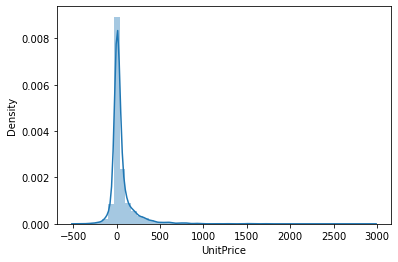

In [126]:
sns.distplot(stockprice['UnitPrice'])

In [128]:
train_data['UnitPrice'].corr(train_data['Quantity'])

-0.39586429891249386

In [32]:
z = stats.zscore(train_data_copy['UnitPrice'])
index_pos = np.argwhere(z>2)
index_neg = np.argwhere(z<-2)

In [33]:
price_index=np.array(index_pos).reshape(-1,)


In [34]:
train_data_copy.drop(price_index,inplace=True)

In [35]:
train_data_copy.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


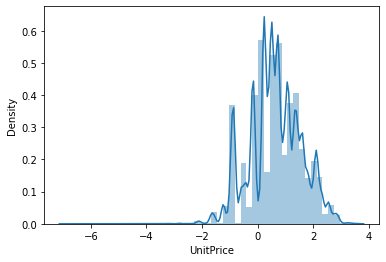

In [34]:
sns.distplot(np.log(train_data_copy['UnitPrice']))

In [36]:
z_demand = stats.zscore(train_data_copy['Quantity'])
index_demand = np.array(np.argwhere(z_demand>2)).reshape(-1,).tolist()

In [35]:
train_data_copy.drop(index_demand,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


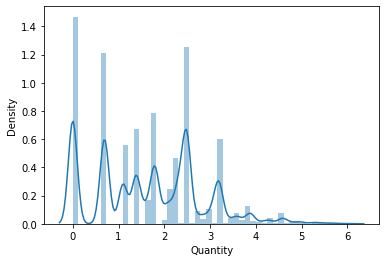

In [41]:
sns.distplot(np.log(train_data_copy['Quantity']))

In [37]:
train_data.isnull().any().sum()

0

In [38]:
quantity = pd.DataFrame(train_data.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=True))

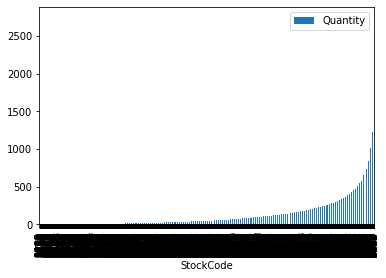

In [48]:
quantity.plot.bar()

In [39]:
stockcode = pd.DataFrame(train_data.loc[:,['StockCode','Country']])
stockcode = stockcode.drop_duplicates()

In [40]:
df_unique = pd.DataFrame(stockcode.groupby(['Country'])['StockCode'].count().sort_values(ascending=True))
#df_unique.plot.bar()

In [41]:
country_unique = pd.DataFrame(stockcode.groupby(['StockCode'])['Country'].count().sort_values(ascending=True))
#country_unique.plot.bar()

In [42]:
Avg_Price = pd.DataFrame(train_data.groupby(['StockCode'])['UnitPrice'].mean().sort_values(ascending=True))
#Avg_Price.plot.bar()

In [43]:
quantity = quantity.reset_index()

In [44]:
Avg_Price = Avg_Price.reset_index()

In [45]:
join_df = pd.merge(quantity,Avg_Price,on='StockCode')

In [45]:
join_df['Quantity'].corr(join_df['UnitPrice'])

-0.13731552794969967

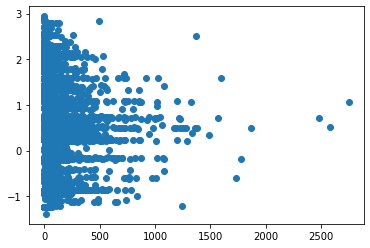

In [46]:
plt.scatter(join_df['Quantity'],join_df['UnitPrice'])

In [ ]:
train_data

In [47]:
country_unique = country_unique.reset_index()

In [49]:
country_price = pd.merge(country_unique,Avg_Price,on='StockCode')

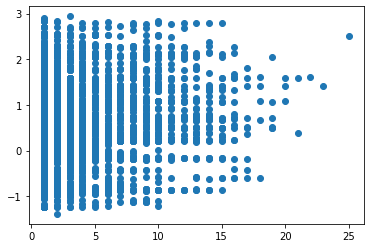

In [50]:
plt.scatter(country_price['Country'],country_price['UnitPrice'])

In [50]:
country_price['UnitPrice'].corr(country_price['Country'])

0.016730609127658856

In [51]:
stock_customer = pd.DataFrame(train_data.loc[:,['StockCode','CustomerID']])
stock_customer = stock_customer.drop_duplicates()

In [52]:
customers = pd.DataFrame(stock_customer.groupby(['StockCode'])['CustomerID'].count().sort_values(ascending=True))
#customers.plot.bar()

In [53]:
customers = customers.reset_index()

In [54]:
customer_price = pd.merge(customers,Avg_Price,on='StockCode')

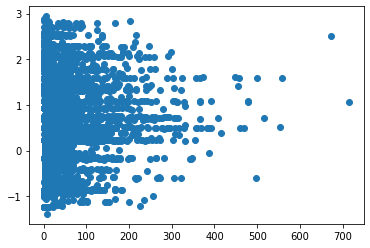

In [56]:
plt.scatter(customer_price['CustomerID'],customer_price['UnitPrice'])

In [55]:
customer_price['CustomerID'].corr(customer_price['UnitPrice'])

-0.0016573235957262516

In [56]:
stock_customer_org = pd.DataFrame(train_data_copy.loc[:,['StockCode','CustomerID']])
stock_customer_org = stock_customer.drop_duplicates()

In [57]:
Avg_Price_org = pd.DataFrame(train_data_copy.groupby(['StockCode'])['UnitPrice'].mean().sort_values(ascending=True))
#Avg_Price_org.plot.bar()

In [58]:
customers_org = pd.DataFrame(stock_customer_org.groupby(['StockCode'])['CustomerID'].count().sort_values(ascending=True))
#customers_org.plot.bar()

In [59]:
customers_org = customers_org.reset_index()
Avg_Price_org = Avg_Price_org.reset_index()
join_customer = pd.merge(customers_org,Avg_Price_org,on='StockCode')

In [60]:
join_customer['CustomerID'].corr(join_customer['UnitPrice'])

-0.03935433457684087

In [61]:
train_data['InvoiceDate'] = pd.to_datetime(train_data['InvoiceDate'])

In [62]:
max_time = pd.DataFrame(train_data.groupby(['StockCode'])['InvoiceDate'].max())
min_time = pd.DataFrame(train_data.groupby(['StockCode'])['InvoiceDate'].min())

In [63]:
time = pd.merge(max_time,min_time,on='StockCode')

In [64]:
time = time.reindex(columns=time.columns.tolist()+['Difference'])

In [65]:
time['Difference'] = (time['InvoiceDate_x'] - time['InvoiceDate_y']).dt.days

In [66]:
time_quantity = pd.merge(time,quantity,on='StockCode')

In [67]:
time_quantity = time_quantity.reindex(columns=time_quantity.columns.tolist()+['quantity_time'])

In [68]:
time_quantity['quantity_time'] = [time_quantity['Quantity'].iloc[i]/time_quantity['Difference'].iloc[i] if time_quantity['Difference'].iloc[i]!=0 else time_quantity['Quantity'].iloc[i] for i in range(len(time_quantity))]

In [69]:
time_quantity_price = pd.merge(time_quantity,Avg_Price,on='StockCode')

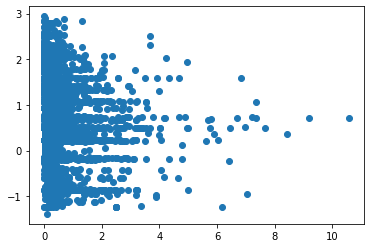

In [123]:
plt.scatter(time_quantity_price['quantity_time'],time_quantity_price['UnitPrice'])

In [70]:
time_quantity_price['Difference'].corr(time_quantity_price['UnitPrice'])

-0.09618318995374556

In [71]:
time_quantity_price['Difference'].corr(time_quantity_price['Quantity'])

0.2961625664959756

In [79]:
train_data['Country']=train_data['Country'].astype('str')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
hasher = FeatureHasher(10,'string')
output = hasher.fit_transform(train_data['Country'])

In [102]:
index_values = range(250426)

In [104]:
output = output.toarray()

In [105]:
column = ['Country_'+str(i) for i in range(1,11)]
df = pd.DataFrame(columns=column,data=output,index=index_values)

TypeError: ignored

In [72]:
time_quantity_price = pd.merge(time_quantity_price,country_unique,on='StockCode')

In [73]:
train_data = pd.merge(train_data,time_quantity_price,on='StockCode')

In [127]:
def quantiles(data):
  Q1_price = data.quantile(0.25)
  Q3_price = data.quantile(0.75)
  IQR_price = Q3_price-Q1_price

  lower_fence_price = Q1_price - (1.5*IQR_price)
  upper_fence_price = Q3_price + (1.5*IQR_price)

  max_price_upper = data[data>upper_fence_price].index
  max_price_lower = data[data<lower_fence_price].index

  max_price = np.concatenate([np.array(max_price_upper),np.array(max_price_lower)])
  return max_price

In [113]:
def sum_column(data,a,b):
  return pd.DataFrame(data.groupby([a])[b].sum().sort_values(ascending=True))

In [114]:
def count_column(data,a,b):
  return pd.DataFrame(data.groupby([a])[b].count().sort_values(ascending=True))

In [122]:
def preprocess(data):
  data = data.drop_duplicates()
  negative_demand = data[data['Quantity']<0].index
  data.drop(negative_demand,inplace=True)
  data.reset_index(drop=True,inplace=True)
  zero_price = data[data['UnitPrice']<=0].index
  data.drop(zero_price,inplace=True)
  data.reset_index(drop=True,inplace=True)
  #data['UnitPrice'] = np.log(data['UnitPrice'])
  price_indexes = quantiles(data['UnitPrice'])
  data.drop(price_indexes,inplace=True)
  data.reset_index(drop=True,inplace=True)
    
  demand_indexes = quantiles(data['Quantity'])
  data.drop(demand_indexes)
  data.reset_index(drop=True,inplace=True)
  #data['Quantity'] = np.log(data['Quantity'])

  return data

In [123]:
def columns(data,a,b):
  stockcode = pd.DataFrame(train_data.loc[:,[a,b]])
  stockcode = stockcode.drop_duplicates()
  return stockcode

In [133]:
def hashing(data):
  hasher = FeatureHasher(10,'string')
  output = hasher.fit_transform(data.astype('str'))
  output = output.toarray()
  index_values = range(len(data))
  column = ['Country_'+str(i) for i in range(1,11)]
  df = pd.DataFrame(columns=column,data=output,index=index_values)
  return df

In [118]:
def split(data,n):
  data = preprocess(data)
  split = int(n*len(data))
  train_data = data[:split]
  validate_data = data[split:]

  return train_data, validate_data

In [147]:
def difference(data,a,b):
  data[b] = pd.to_datetime(data[b])
  max_time = pd.DataFrame(data.groupby([a])[b].max())
  min_time = pd.DataFrame(data.groupby([a])[b].min())
  time = pd.merge(max_time,min_time,on=a)
  time = time.reindex(columns=time.columns.tolist()+['Difference'])
  time['Difference'] = (time[b+'_x'] - time[b+'_y']).dt.days
  df_time = pd.DataFrame(time.loc[:,[a,'Difference']])
  return df_time

In [142]:
def transform_data(data):
  sum = sum_column(data,'StockCode','Quantity')
  data = pd.merge(data,sum,on='StockCode')
  df = columns(data,'StockCode','Country')
  count = count_column(df,'StockCode','Country')
  data = pd.merge(data,count)
  hash_columns = hashing(data['Country'])
  data = pd.concat([data,hash_columns],axis=1)
  df_time = difference(data,'StockCode','InvoiceDate')
  data = pd.merge(data,df_time,on='StockCode')
  #data.drop(['Country','StockCode','InvoiceNo','Description','InvoiceDate'])
  return data
  

In [144]:
training_data = preprocess(training_data)

In [148]:
train_data, validate_data = split(training_data,0.95)

In [149]:
train_data = transform_data(train_data)

KeyError: ignored

In [ ]:
def normalize()